# Matplotlib

## 데이터 시각화 Data Visualization
> 앤스콤 4분할 그래프는 데이터를 시각화하지 않고 수치만 확인할 때 발생할 수 있는 함정을 보여주는 그래프이다.
>
> 앤스콤 4분할 그래프를 구성하는 데이터 집합은 각 x, y 열 지닌 4개의 그룹으로 구성되어 있다. 그런데 이 4개의 데이터 그룹은 각각 평균, 분산과 같은 수칫값이나 상관관계, 회귀선이 같다는 특징이 있어 '데이터 그룹 I,II,III,IV 의 데이터는 모두 같을 것이다' 라고 착각 할 수 있다.
>
> 하지만 각 데이터 그룹을 시각화하면 데이터 그룹이 서로 다른 데이터 패턴을 가지고 있다는 점을 알 수 있다.

In [1]:
# 앤스콤 데이터 셋은 seaborn 라이브러리에 포함
import seaborn as sns

anscombe = sns.load_dataset("anscombe")
print(anscombe[:10])
print(type(anscombe))

  dataset     x      y
0       I  10.0   8.04
1       I   8.0   6.95
2       I  13.0   7.58
3       I   9.0   8.81
4       I  11.0   8.33
5       I  14.0   9.96
6       I   6.0   7.24
7       I   4.0   4.26
8       I  12.0  10.84
9       I   7.0   4.82
<class 'pandas.core.frame.DataFrame'>


In [2]:
import matplotlib.pyplot as plt

# 위에 anscombe 데이터프레임에서 dataset 열의 데이터를 따로따로 추출
dataset_1 = anscombe[anscombe['dataset'] == 'I']
dataset_2 = anscombe[anscombe['dataset'] == 'II'] 
dataset_3 = anscombe[anscombe['dataset'] == 'III'] 
dataset_4 = anscombe[anscombe['dataset'] == 'IV']

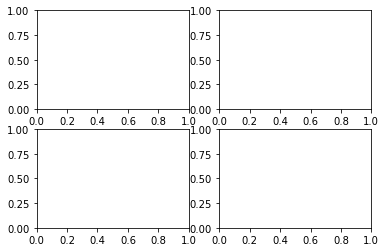

In [3]:
# figure : 그래프 격자가 위치할 figure
fig = plt.figure()

# add_subplot() : figure에 격자를 추가
axes1 =fig.add_subplot(2, 2, 1)
axes2 =fig.add_subplot(2, 2, 2)
axes3 =fig.add_subplot(2, 2, 3)
axes4 =fig.add_subplot(2, 2, 4)

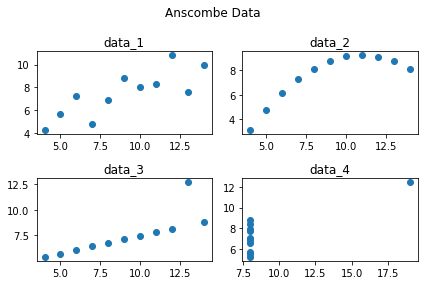

In [4]:
# plot() : 그래프를 그리는 메서드
# plot의 세번째 인자로 그래프 모양 변경 가능 (o로 점 그래프)
axes1.plot(dataset_1['x'], dataset_1['y'], 'o')
axes2.plot(dataset_2['x'], dataset_2['y'], 'o')
axes3.plot(dataset_3['x'], dataset_3['y'], 'o')
axes4.plot(dataset_4['x'], dataset_4['y'], 'o')

# set_title() : 그래프 격자 제목 추가 
axes1.set_title("data_1")
axes2.set_title("data_2")
axes3.set_title("data_3")
axes4.set_title("data_4")

# suptitle() : 전체 figure 제목 추가
fig.suptitle("Anscombe Data")
# tight_layout() : 그래프 레이아웃 조절
fig.tight_layout()
fig

## matplotlib 라이브러리

### 히스토그램 Historgram
* 데이터프레임의 열 데이터 분포와 빈도를 살펴보는 용도로 자주 쓰이는 그래프이다.
* 변수를 하나만 사용해서 그린 그래프를 **일변량 그래프(Univariate)**라고 한다.

In [5]:
# 어떤 식당에서 팁을 지불한 손님의 정보를 모은 데이터
# 음식 가격, 팁, 성별, 흡연 유무, 요일, 시간, 인원

tips = sns.load_dataset('tips')

print(tips.head()) 
print(type(tips))

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
<class 'pandas.core.frame.DataFrame'>


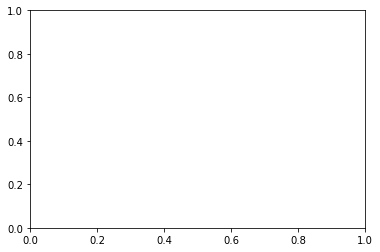

In [6]:
fig = plt.figure()
# 그래프가 하나일 때는 subplot(1,1,1)을 쓰지만 큰 의미는 없다
axes1 = fig.add_subplot(1,1,1)

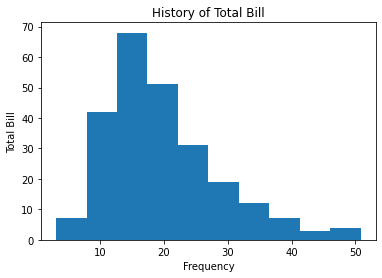

In [7]:
axes1.hist(tips['total_bill'], bins= 10) 
axes1.set_title('History of Total Bill') 
axes1.set_xlabel('Frequency') 
axes1.set_ylabel('Total Bill')
fig

### 산점도 그래프 Scatter graph
* 변수 2개를 사용해서 만드는 그래프이다.
* 변수 2개를 사용하기 때문에 통계 용어로는 **이변량 그래프(Bivariate)**라고 부른다.


Text(0, 0.5, 'Tip')

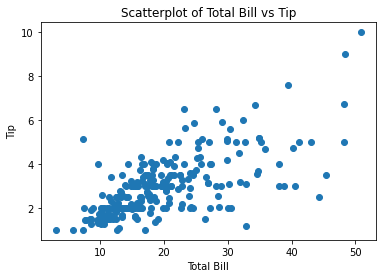

In [8]:
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1,1,1)

axes1.scatter(tips['total_bill'], tips['tip']) 
axes1.set_title('Scatterplot of Total Bill vs Tip')     # 음식값과 팁의 상관관계
axes1.set_xlabel('Total Bill') 
axes1.set_ylabel('Tip')

### 박스 그래프 Box graph
* 이산형 변수와 연속형 변수를 함께 사용하는 그래프이다.
* **이산형 변수(Discrete variable**은 Female, Male과 같이 명확하게 구분되는 값을 의미하고 **연속형 변수(Continuous variable)**은 Tip과 같이 명확하게 셀 수 없는 범위의 값을 의미한다.

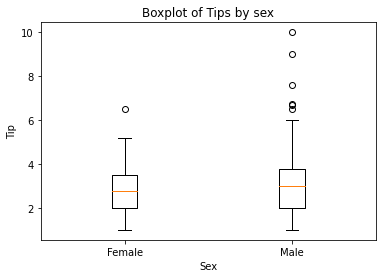

In [9]:
# 경고 메세지 출력을 사전 차단하기 위해 쓰이는 메서드
import warnings 
warnings.filterwarnings('ignore')

boxplot = plt.figure()
axes1 = boxplot.add_subplot(1,1,1) 
axes1.boxplot([tips[tips['sex']=='Female']['tip'], tips[tips['sex']=='Male']['tip']], labels = ['Female', 'Male'])

axes1.set_xlabel('Sex') 
axes1.set_ylabel('Tip') 
axes1.set_title('Boxplot of Tips by sex') 
plt.show()

### 다변량 그래프 Multivariate
* 3개 이상의 변수를 사용한 그래프를 말한다.
* 기존의 음식값-팁의 산점도 그래프를 성별 별로 표현하기 위해서는 *점의 색상을 다르게* 하면 된다. 
* 문자열은 산점도 그래프의 색상을 지정하는 값으로 사용될 수 없으므로 각 문자열을 정수로 치환해야 한다.

```python
    def recode_sex(sex):
      if sex == 'Female':
        return 0
      else:
        return 1
```

* apply() : 함수를 받아서 데이터에 적용시키는 함수

In [10]:
def recode_sex(sex):
  if sex == 'Female':
    return 0
  else:
    return 1

tips['sex_color'] = tips['sex'].apply(recode_sex) 
# sex_color가 남, 여에 따라 0, 1로 출력
print(tips.head())     

   total_bill   tip     sex smoker  day    time  size sex_color
0       16.99  1.01  Female     No  Sun  Dinner     2         0
1       10.34  1.66    Male     No  Sun  Dinner     3         1
2       21.01  3.50    Male     No  Sun  Dinner     3         1
3       23.68  3.31    Male     No  Sun  Dinner     2         1
4       24.59  3.61  Female     No  Sun  Dinner     4         0


Text(0, 0.5, 'Tip')

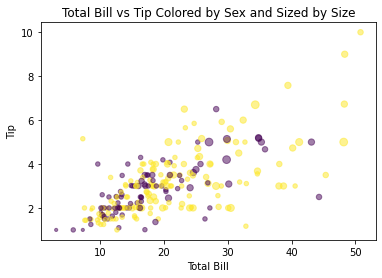

In [11]:
scatter_plot = plt.figure()

# s : size, c : color, alpha : 투명도 
axes1 = scatter_plot.add_subplot(1,1,1) 
axes1.scatter(
    x=tips['total_bill'], 
    y=tips['tip'], 
    s=tips['size']*10, 
    c=tips['sex_color'], 
    alpha = 0.5)

axes1.set_title('Total Bill vs Tip Colored by Sex and Sized by Size') 
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')

## seaborn 라이브러리

* seaborn 라이브러리를 활용하면 다양한 그래프를 그릴 수 있다.
* seaborn은 matplotlib을 기반으로 만들어진 라이브러리로 **high-level interface**를 제공한다.
* matplotlib 라이브러리보다 다양한 방법으로 산점도 그래프를 그릴 수 있다.

```
subplots()
distplot()
````
regplot() : 산점도 그래프와 회귀선을 그릴 수 있다. 이 때 hex 인자값으로 산점도 그래프를 육각 그래프로 그릴 수 있다.

## 데이터 연결하기
> 데이터 분석 단계에서 데이터 정리는 아주 중요하다. 실제로 데이터 분석 작업의 *70% 이상을 차지하고 있는 작업*이 데이터 정리 작업이다. 
>
> 분석하기 좋은 데이터는 다음 조건을 만족해야 한다.
> * 데이터 분석 목적에 맞는 데이터를 모아 새로운 표(table)을 만들어야 한다.
> * 측정한 값은 행(row)을 구성해야 한다.
> * 변수는 열(column)로 구성해야 한다.


* 데이터 집합은 연관성이 깊은 값 끼리 모여 있기 때문에 데이터 연결을 통해 필요한 데이터를 만드는 과정이 반드시 필요하다.
* concat() : 데이터를 연결하는데 쓰인다. (concat은 연결 concatenation에서 따온 것이다.)
    + concat() 메서드로 연결한 데이터프레임은 위에서 아래 방향으로 그대로 연결하고 인덱스도 유지한다.
    + concat() 메서드는 한 번에 2개 이상의 데이터프레임을 연결할 수 있는 메서드이다.
* append() : 연결할 데이터 프레임이 1개 일 때 사용할 수 있다.
* merge() : Pandas의 데이터 연결 전용 메서드이다. 
    + 기본적으로 메서드를 사용한 데이터프레임을 왼쪽으로 지정하고 첫 번째 인잣값으로 지정한 데이터프레임을 오른쪽으로 지정합니다

In [12]:
import pandas as pd

# 특정 위치의 날씨 정보에 필요한 데이터 집합
# person은 관측한 사람의 이름, site는 관측 위치, visited는 관측 날짜, survey는 날씨 정보
person = pd.read_csv('data_visual/survey_person.csv') 
site = pd.read_csv('data_visual/survey_site.csv') 
survey = pd.read_csv('data_visual/survey_survey.csv') 
visited = pd.read_csv('data_visual/survey_visited.csv')

print(person); print(site); print(survey); print(visited)

      ident   personal    family
0      dyer    William      Dyer
1        pb      Frank   Pabodie
2      lake   Anderson      Lake
3       roe  Valentina   Roerich
4  danforth      Frank  Danforth
    name    lat    long
0   DR-1 -49.85 -128.57
1   DR-3 -47.15 -126.72
2  MSK-4 -48.87 -123.40
    taken person quant  reading
0     619   dyer   rad     9.82
1     619   dyer   sal     0.13
2     622   dyer   rad     7.80
3     622   dyer   sal     0.09
4     734     pb   rad     8.41
5     734   lake   sal     0.05
6     734     pb  temp   -21.50
7     735     pb   rad     7.22
8     735    NaN   sal     0.06
9     735    NaN  temp   -26.00
10    751     pb   rad     4.35
11    751     pb  temp   -18.50
12    751   lake   sal     0.10
13    752   lake   rad     2.19
14    752   lake   sal     0.09
15    752   lake  temp   -16.00
16    752    roe   sal    41.60
17    837   lake   rad     1.46
18    837   lake   sal     0.21
19    837    roe   sal    22.50
20    844    roe   rad    11.25
  

In [13]:
# visted의 일부 데이터만 사용
visited_subset = visited.loc[[0, 2, 6], ] 
print(visited_subset)

   ident   site       dated
0    619   DR-1  1927-02-08
2    734   DR-3  1939-01-07
6    837  MSK-4  1932-01-14


In [14]:
# merge 메서드를 사용한 site를 왼쪽으로 지정하고 visted_subset을 오른쪽으로 지정
o2o_merge = site.merge(visited_subset, left_on='name', right_on='site') 
print(o2o_merge)

    name    lat    long  ident   site       dated
0   DR-1 -49.85 -128.57    619   DR-1  1927-02-08
1   DR-3 -47.15 -126.72    734   DR-3  1939-01-07
2  MSK-4 -48.87 -123.40    837  MSK-4  1932-01-14


In [15]:
# site, visted 연결
m2o_merge = site.merge(visited, left_on='name', right_on='site') 
print(m2o_merge)

    name    lat    long  ident   site       dated
0   DR-1 -49.85 -128.57    619   DR-1  1927-02-08
1   DR-1 -49.85 -128.57    622   DR-1  1927-02-10
2   DR-1 -49.85 -128.57    844   DR-1  1932-03-22
3   DR-3 -47.15 -126.72    734   DR-3  1939-01-07
4   DR-3 -47.15 -126.72    735   DR-3  1930-01-12
5   DR-3 -47.15 -126.72    751   DR-3  1930-02-26
6   DR-3 -47.15 -126.72    752   DR-3         NaN
7  MSK-4 -48.87 -123.40    837  MSK-4  1932-01-14


In [16]:
ps = person.merge(survey, left_on='ident', right_on='person') 
vs = visited.merge(survey, left_on='ident', right_on='taken')

# 여러 개의 열 동시에 전달 가능
ps_vs = ps.merge(vs, left_on=['ident', 'taken', 'quant', 'reading'], 
                 right_on=['person', 'ident', 'quant', 'reading'])
# print(ps_vs)
print(ps_vs.loc[0,])

ident_x           dyer
personal       William
family            Dyer
taken_x            619
person_x          dyer
quant              rad
reading           9.82
ident_y            619
site              DR-1
dated       1927-02-08
taken_y            619
person_y          dyer
Name: 0, dtype: object


## NaN 처리하기
* 누락값(NaN)은 데이터 자체가 없다는 것을 의미한다. 
* 누락값은 처음부터 누락값이 있는 데이터를 불러오거나 데이터를 연결, 입력하는 등의 과정에서 생길 수 있다.
* Boolean을 사용해도 False만 출력되고 자기 자신과 비교해도 False가 출력된다.
    + print(NaN == NaN); False
* isnull() : 누락값을 확인하는 메서드
* notnull() : 누락값이 아닌 경우를 확인하는 메서드

~~~python
    from numpy import NaN, NAN, nan
~~~

* 누락값 처리하기 : 임의의 값으로 변경하거나 데이터프레임에 이미 있는 값으로 대신 채우는 방법 등으로 처리한다.
* 누락값 변경하기 : fillna() 메서드에 0을 대입하면 누락값을 0으로 변경한다.
    + fillna() 메서드는 처리해야 하는 데이터프레임의 크기가 매우 크고 메모리를 효율적으로 사용해야 하는 경우에 자주 사용된다.
        + ffill : 누락값이 나타나기 전의 값으로 누락값이 변경
        + bfill : 누락값이 나타난 이후의 첫 번째 값으로 앞쪽의 누락값이 모두 변경
    * interpolate() : 누락값 양쪽에 있는 값을 이용하여 중간값을 구한 다음 누락값을 처리한다.
        + 데이터프레임이 일정한 간격을 유지하고 있는 것 처럼 수정할 수 있다.
    
* 누락값 삭제하기 : dropna() 메서드를 사용한다.
* 누락값 무시하기 : sum 메서드를 사용할 때 skipna 인자를 True로 설정하면 누락값을 무시한 채 계산한다 (default = True)